<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/colorGrading/tests/DeepPreset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Preset : Blending and Retouching Photos with Color Style Transfer

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2007.10701)
[![GitHub Stars](https://img.shields.io/github/stars/minhmanho/deep_preset?style=social)](https://github.com/minhmanho/deep_preset)


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

In [ ]:
!nvidia-smi

Fri Apr 15 11:36:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

1. linking next cloud

In [ ]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='colorGrading',library='DeepPreset')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0  15204      0 --:--:-- --:--:-- --:--:-- 15204
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0


2. Clone Git repository

In [ ]:
import os
root_path = '/content/DeepPreset'

# folder with style transfer
style_folder = '/content/database/colorGrading/style'

# clone the repository
if not os.path.exists('DeepPreset'):
  !git clone https://github.com/minhmanho/deep_preset {root_path}

%ls

Cloning into '/content/DeepPreset'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 93 (delta 9), reused 14 (delta 6), pack-reused 76
Unpacking objects: 100% (93/93), done.
database/  database_mod.py  DeepPreset/  __pycache__/  sample_data/


3. Set up the environment

In [ ]:
%cd {root_path}

# Set up the environment
!pip install Numpy
!pip install Pillow
!pip3 install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

/content/DeepPreset
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 53.5 MB/s eta 0:00:19tcmalloc: large alloc 1147494400 bytes == 0x560e86d7c000 @  0x7fc2a1aef615 0x560e4c76217c 0x560e4c84247a 0x560e4c764f9d 0x560e4c856d4d 0x560e4c7d8ec8 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d8d30 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d5719 0x560e4c857b76 0x560e4c7d4d95 0x560e4c857b76 0x560e4c7d4d95 0x560e4c857b76 0x560e4c7d4d95 0x560e4c766ce9 0x560e4c7aa579 0x560e4c765902 0x560e4c7d8c4d 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d5719 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d48f6 0x560e4c7667aa 0x560e4c7d4b4f 0x560e4c7d3a2e
     |██████████████████▌             | 1055.7 MB 1.4 MB/s eta 0:08:54tcmalloc: large alloc 1434370048 bytes == 0x560ecb3d2000 @  0x7fc2a1aef615 0x560e4c76217c 0x560e4c84247a 0x560e4c764f9d 0x560e4c856d4d 0x560e4c7d8ec8 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d8d30 0x560e4c7d3a2e 0x560e4c76688a 0x560e4c7d5719 

Only needed when we have to "**restart the Runtime**", otherwise 
the variables aren't defined.

In [ ]:
# populate vars when runtime restart is needed
input_folder = '/content/database/colorGrading/input'
output_folder = '/content/database/colorGrading/DeepPreset'
style_folder = '/content/database/colorGrading/style'
root_path = '/content/DeepPreset'

print ('input ::: ' , input_folder)
print ('output ::: ' , output_folder)
print ('style ::: ' , style_folder)
print ('root ::: ' , root_path)

input :::  /content/database/ImageEditing/input
output :::  /content/database/ImageEditing/DeepPreset
style :::  /content/database/ImageEditing/style
root :::  /content/DeepPreset


4. Download the pre-trained model

In [ ]:
%ls
# Download the pre-trained model
# one of the two models is gonna work better (cfr paper)
# Deep Preset with PPL (Positive Pair-wise Loss)
!sh models/fetch_model_wPPL.sh

# Deep Preset without PPL for preset prediction
#!sh models/fetch_model_woPPL.sh

data/  docs/  dp.py  models/  networks/  README.md  run.py  utils.py
Downloading...
From: https://drive.google.com/uc?id=1GegyHf3OD17k_WID3-vA7S8nRQwPfpTC
To: /content/DeepPreset/models/dp_wPPL.pth.tar
100% 1.07G/1.07G [00:08<00:00, 132MB/s]


# 2. Inference


In [ ]:
# vars
print (input_folder)
print (output_folder)
print (style_folder)

# change dir
%cd {root_path}

# CUDA_VISIBLE_DEVICES=0 python run.py
#    --content ./data/content/
#    --style ./data/style/
#    --out ./data/out/
#    --ckpt ./models/dp_wPPL.pth.tar
#    --size 512x512
#    --p (only preset prediction needed)   

!python run.py --content {input_folder} --style {style_folder} --out {output_folder} --ckpt models/dp_wPPL.pth.tar --size 400x592

/content/database/ImageEditing/input
/content/database/ImageEditing/DeepPreset
/content/database/ImageEditing/style
/content/DeepPreset
1/8: 1.jpg
2/8: 2.jpg
3/8: 3.jpg
4/8: 4.jpg
5/8: 5.jpg
6/8: 6.jpg
7/8: 7.jpg
8/8: 8.jpg
Done !


# 3. Visualization

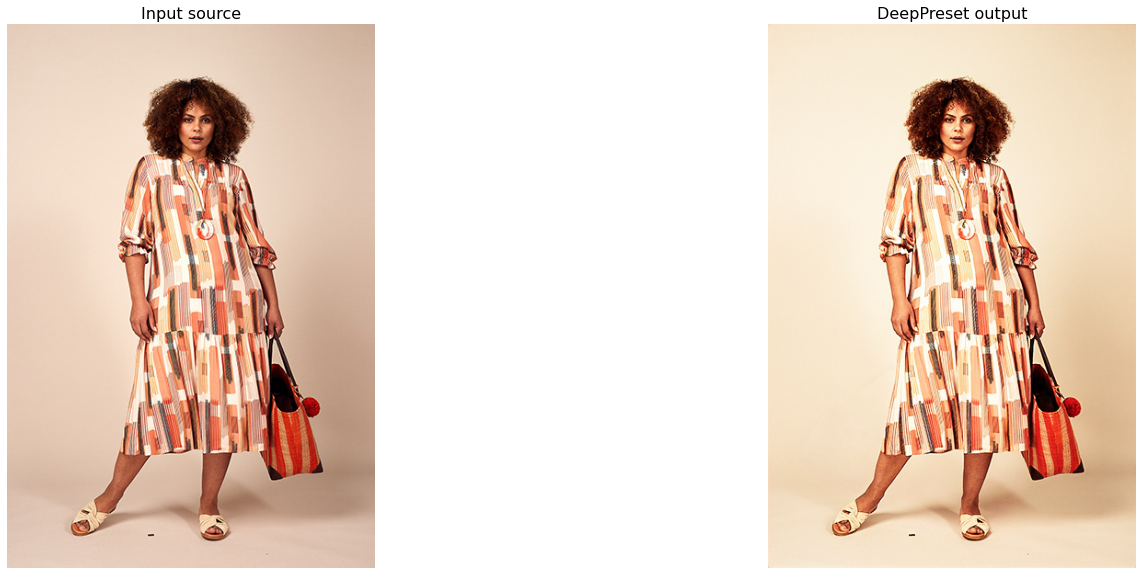

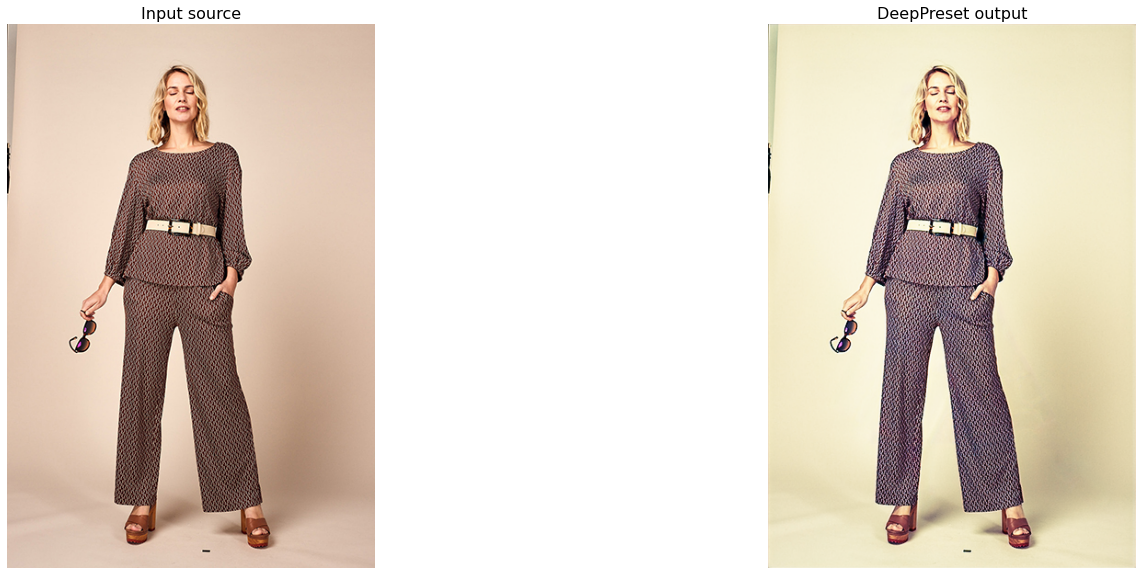

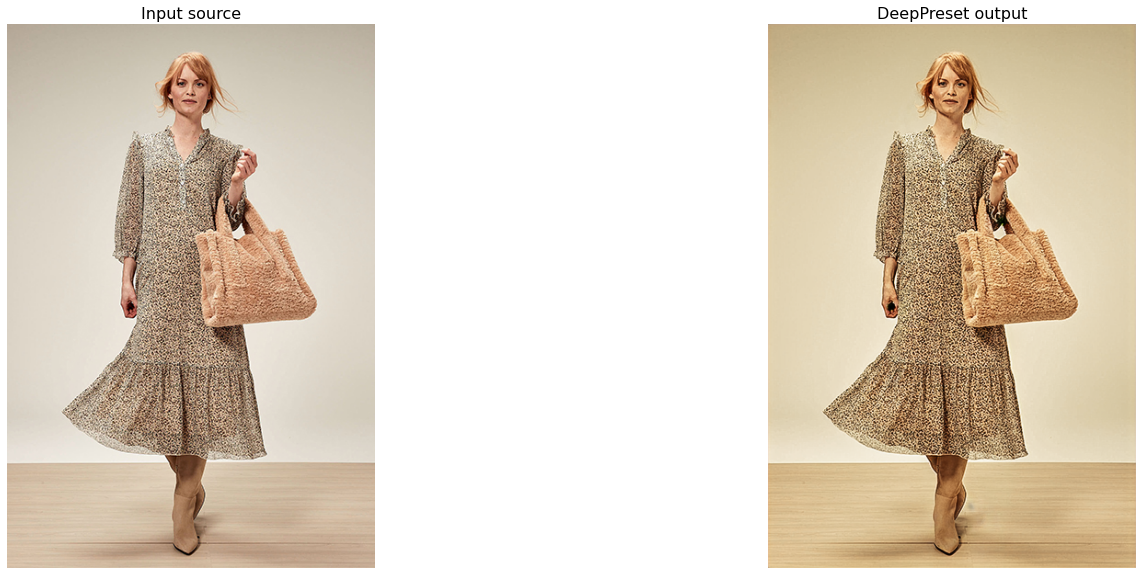

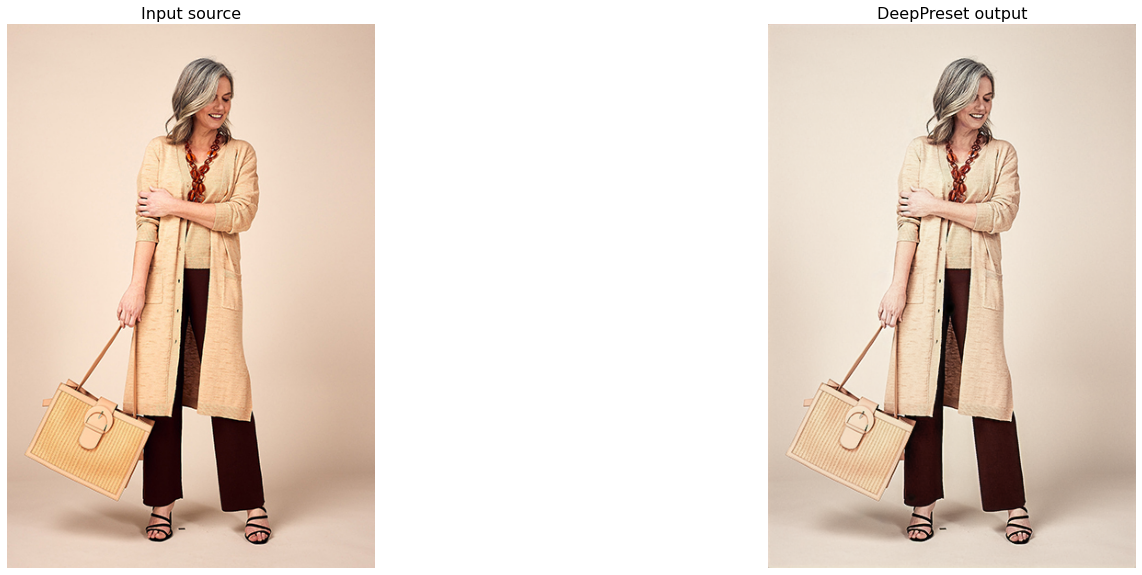

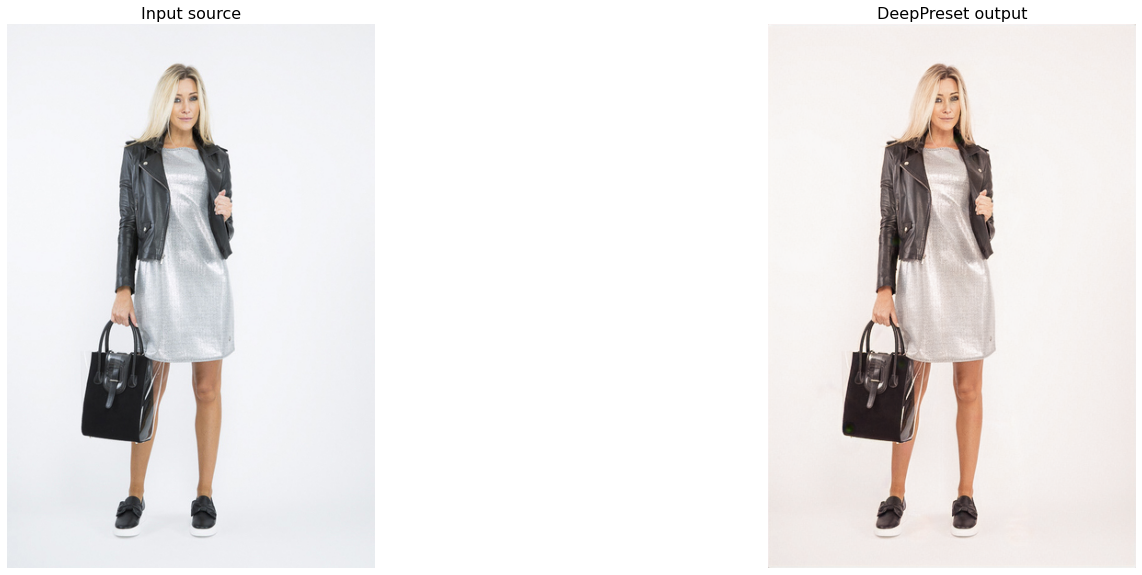

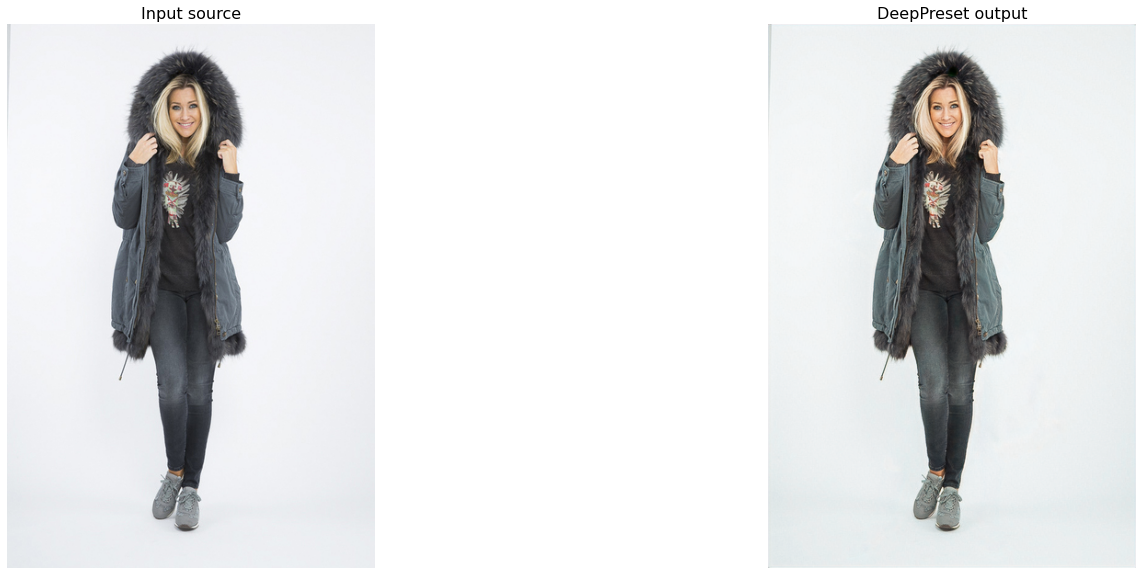

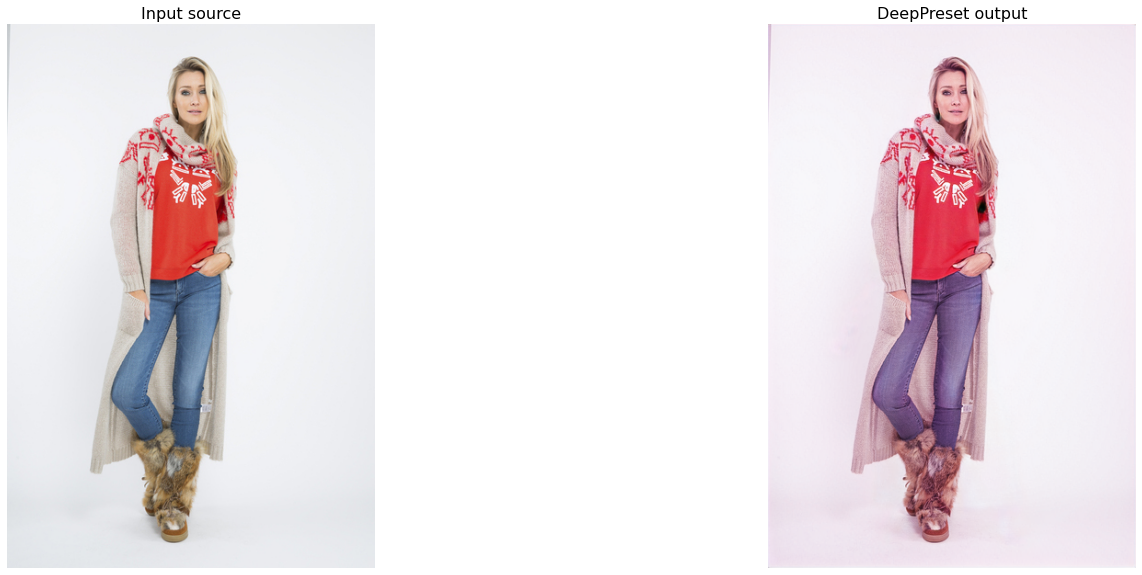

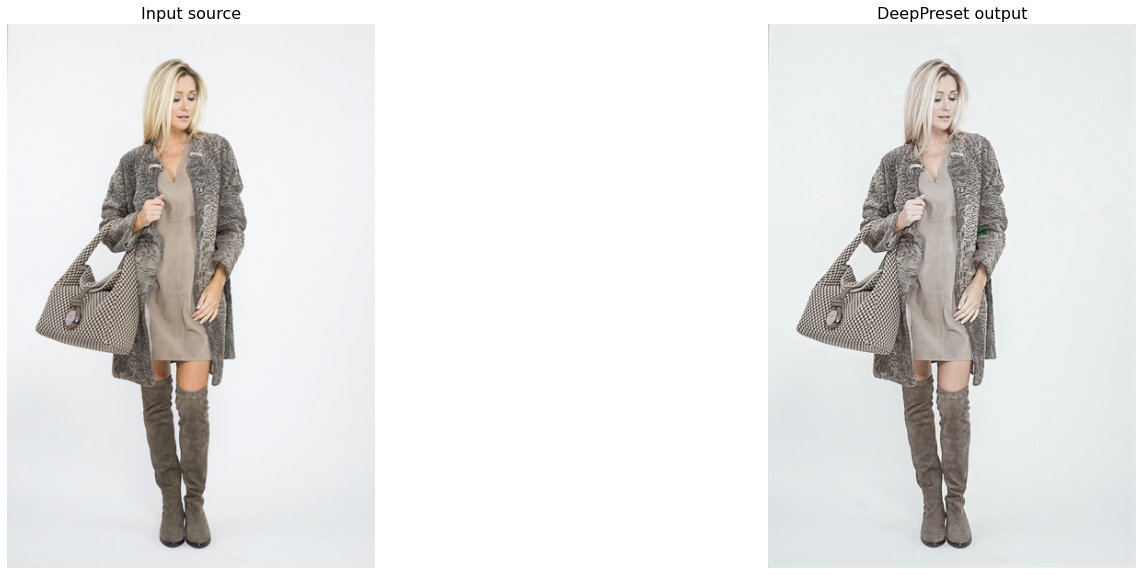

In [ ]:
# utils for visualization
import os
import glob
import cv2
import matplotlib.pyplot as plt

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input source', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('DeepPreset output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# making a list of both I/O folders
input_list = sorted(glob.glob(os.path.join(input_folder, '*.jpg')))
output_list = sorted(glob.glob(os.path.join(output_folder, '*.png')))

# display each image in the upload folder
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 4. Download Results


In [ ]:
# Download the results
zip_filename = 'DeepPreset.zip'

download_zip(zip_filename, output_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>